# Clase 3: Algortimos de Machine Learning: Regresion Lineal Simple

En esta clase veremos:
1. Conocimientos teóricos sobre regresion lineal simple
2. La libreria NumPy
3. La libreria Matplot
4. Crear y entrenar un modelo de regresion lineal simple

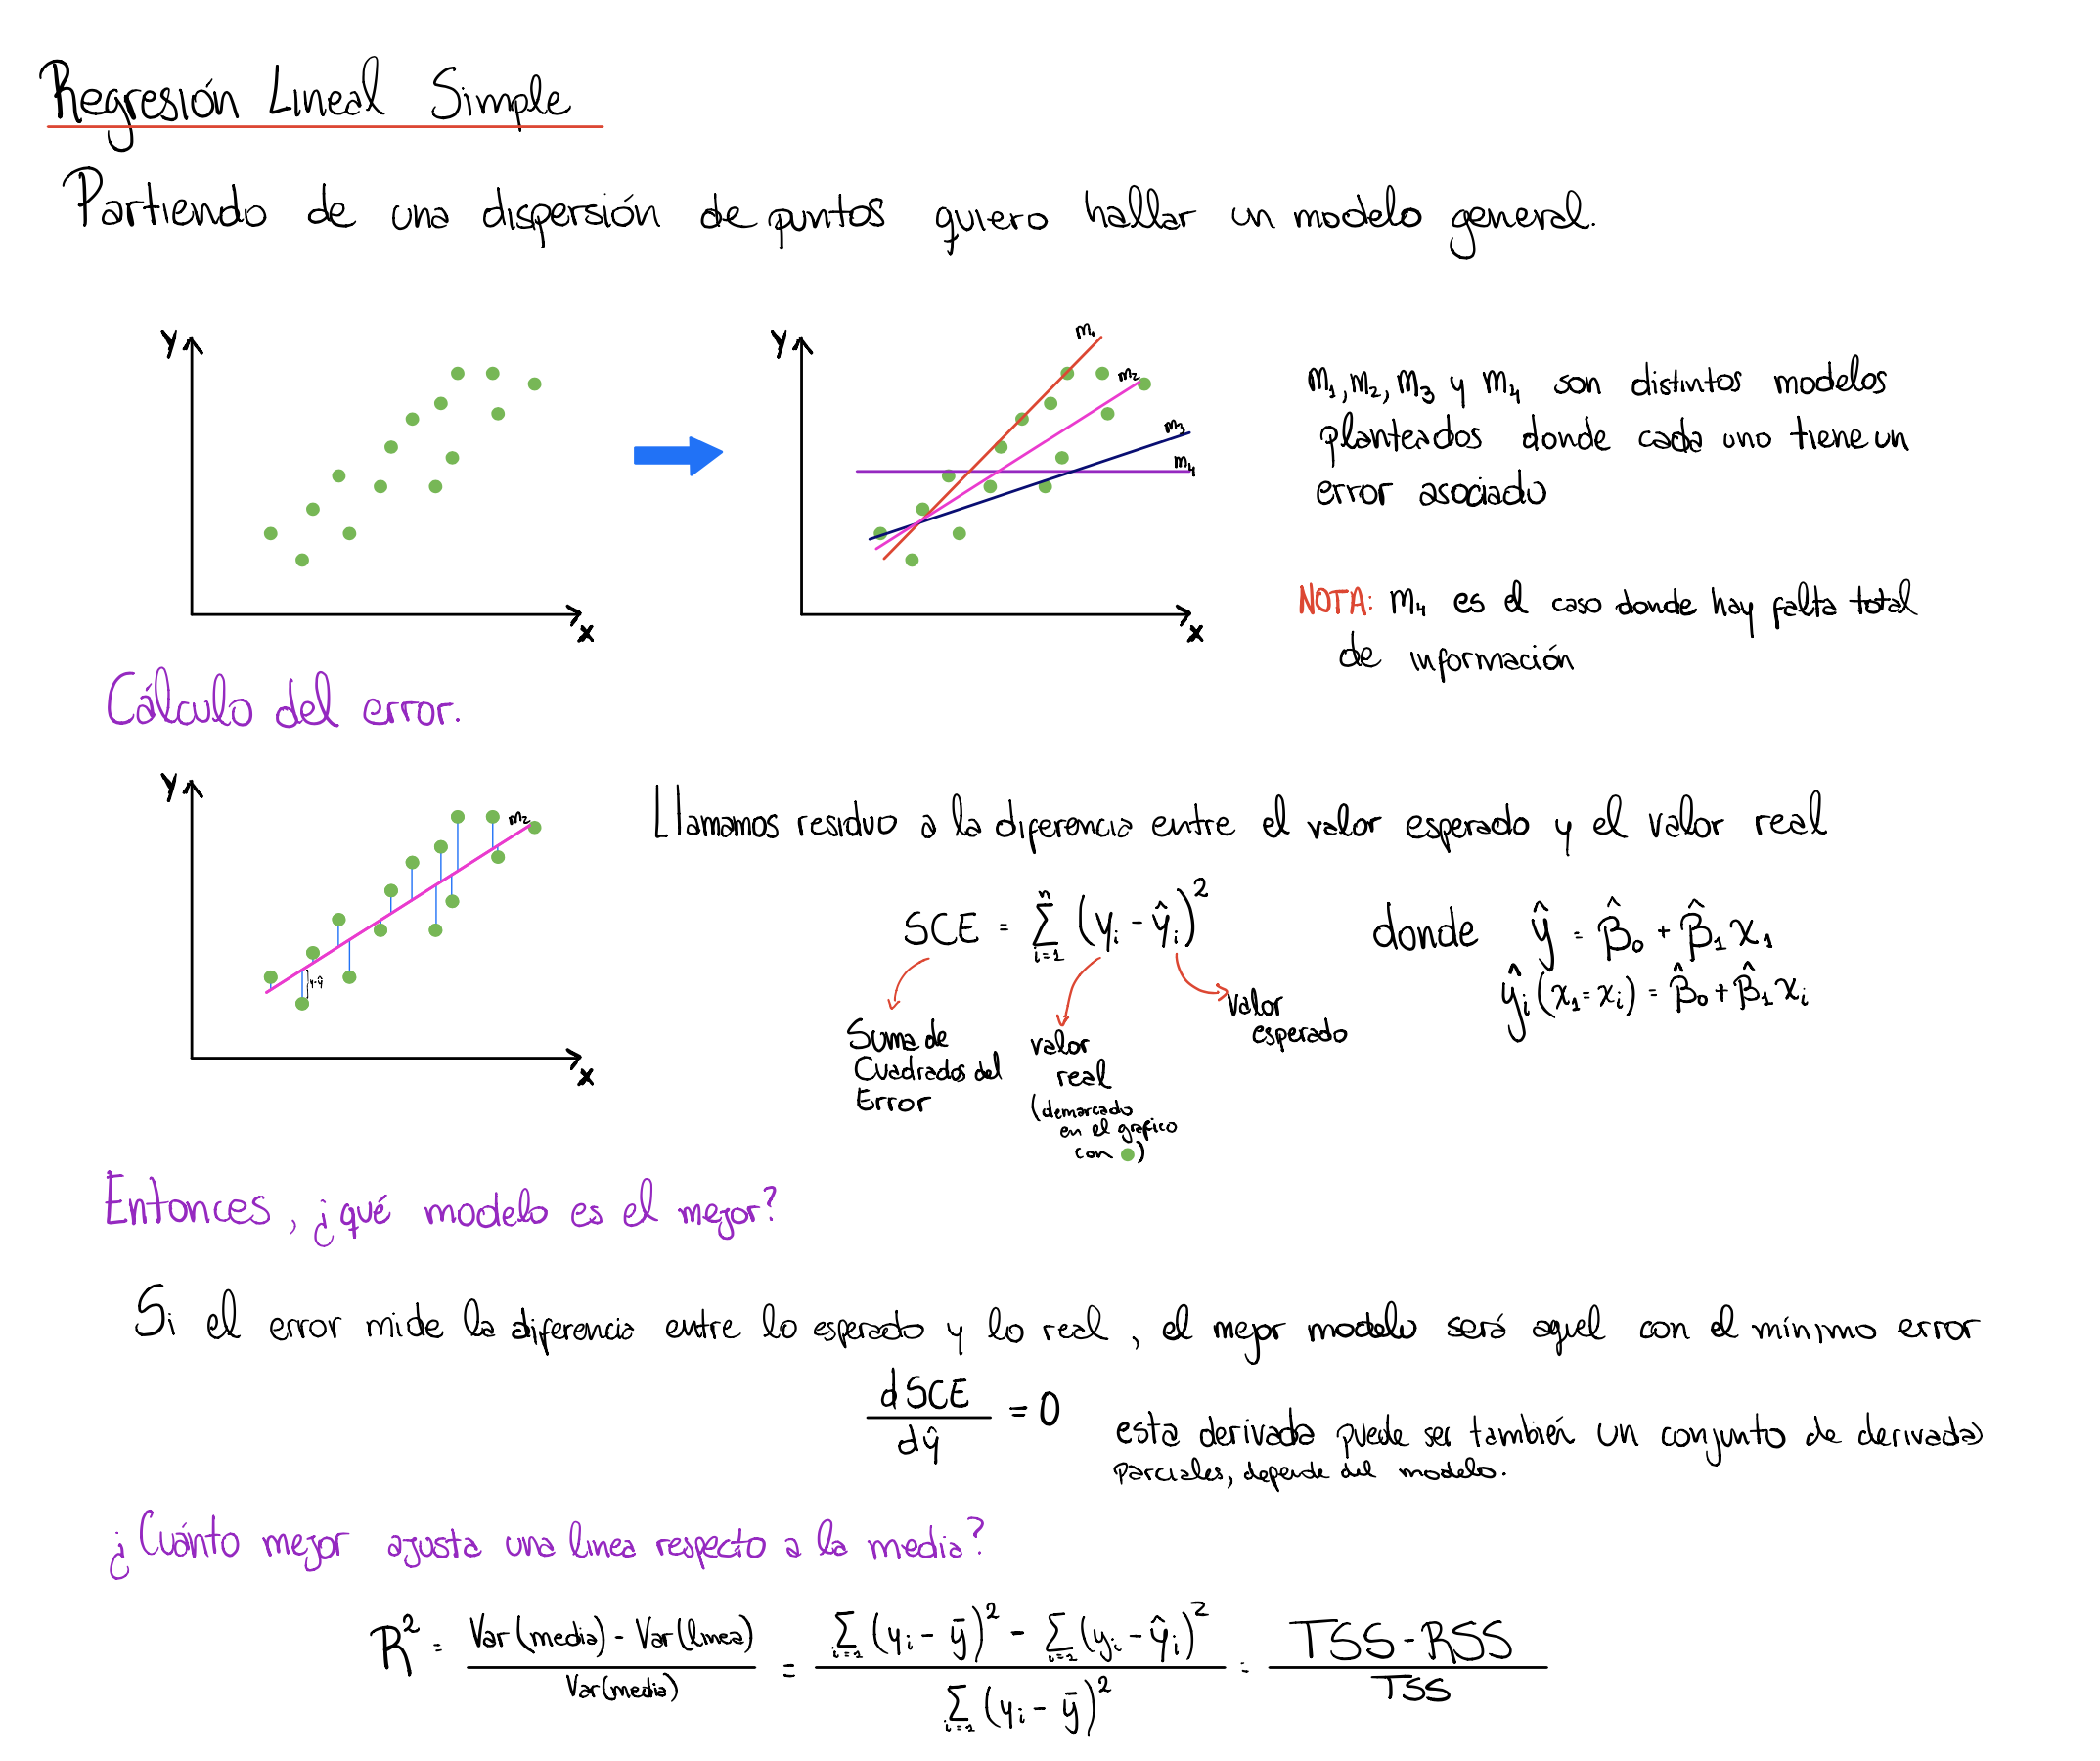

Para trabajar con datos, en Python es necesario conocer algunas librerias muy utiles para procesamiento y visualizacion de datos. 

## NUMPY

NumPy es una libreria que contiene funciones matematicas de "alto nivel" para operar con matrices y vectores. 

¿Que significa de alto nivel? Quiere decir que son faciles de entender para el ser humano. 

Vamos a explorar algunas funciones...

Para acceder a toda la documentacion: https://numpy.org

In [ ]:
import numpy as np
#Crear una matriz de 15 elementos, del 0 al 14, donde la matriz sea de 3x5
a = np.arange(15).reshape(3, 5)
a
#Si solo aplicaramos np.arrange(15) tendriamos un vector de 15 elementos

In [ ]:
#Podemos preguntar que tamaño tiene X matriz
a.shape

In [ ]:
#Para crear un array con determinados valores
array = np.array([10,21,23,22])
array

In [ ]:
#Podemos convertir en matriz a un vector
matriz_cuadrada = array.reshape(2,2)
matriz_cuadrada

In [ ]:
#Podemos convertir en vector a una matriz (tecnicamente se convierte en una matriz de una sola fila)
vector = matriz_cuadrada.reshape(1,-1)
vector

In [ ]:
#Las operaciones entre matrices son muy simples con NumPy

A = np.array( [[1,1],[0,1]] )
B = np.array( [[2,0], [3,4]] )
#Producto de elemento por elemento
A * B               

In [ ]:
#Producto de matrices
A @ B

In [ ]:
#Accediendo a los datos
vector = np.arange(5)
#El indice va desde 0 hasta n-1, como los arreglos que ya conociamos
print(vector[1])
#Para acceder a una porcion
print(vector[0:2])
print(vector[2:5])
#Para acceder al ultimo elemento si no conocemos el tamaño
print(vector[-1])
#Para acceder a una porcion desde el final, en este caso los dos ultimos
print(vector[-2:])
#Para acceder a una porcion desde el final, en este caso todos menos los dos ultimos
print(vector[:-2])

In [ ]:
#Para convertir una fila en columna
vector[:, np.newaxis]

## MATPLOT

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy



In [ ]:
import matplotlib.pyplot as plt
#Grafiquemos X contra Y
X = [1,2,3,4]
Y = [2,4,6,8]

plt.plot(X,Y)

In [ ]:
#Podemos customizarlo un poco
plt.plot(X,Y,'r')

In [ ]:
plt.plot(X,Y,'ro')

In [ ]:
plt.plot(X,Y,'mD')

Aqui podras encontrar todas las opciones de formato
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

In [ ]:
#Creemos la funcion X^2, generamos los valores X de 0 al 19, luego los Y seran X*X. Con numpy esta multiplicacion
#es muy sencilla y encima matplot la entiende!
X = np.arange(20)
Y = X*X
plt.plot(X,Y)

In [ ]:
X = np.arange(20)
Y = X*X
W = X*2
#Ahora vamos a graficar X contra Y y X contra W en el mismo grafico
plt.plot(X,Y,W)

In [ ]:
#Ahora podemos agregar una dispersion de puntos 
plt.scatter(X,Y)
plt.plot(X,Y)

# Entrenando un modelo de Regresion Lineal Simple

In [ ]:
#Importamos la libreria sklearn, una libreria sobre machine learning en Python. De estas librerias traemos datasets,
#que son datos que vienen con la libreria para fines educativos. Traeremos el modelo de regresion lineal que vamos
#a entrenar.
from sklearn import datasets, linear_model
#De la libreria sklearn.metrics traeremos aqullas formulas que nos permiten evaluar la precision de las predicciones
from sklearn.metrics import mean_squared_error, r2_score

Nuestro dataset a usar: Boston (https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

El mismo posee atributos de casas en la ciudad de Boston y su precio.

In [ ]:
#Veamos la descripcion del dataset
print(datasets.load_boston(return_X_y=False).DESCR)

In [ ]:
var_explicativas, var_objetivo = datasets.load_boston(return_X_y=True)

In [ ]:
#Como vamos a hacer una regresion lineal simple, elijamos una sola variable explicativa. En nuestro caso elegiremos
#observar como afecta la concentracion de oxido nitrico (4) el precio de las casas. 

In [ ]:
oxido_nitrico = var_explicativas[:,4]
#Veamos los primeros 5 elementos
oxido_nitrico[:5]

In [ ]:
#Para introducirlo en nuestro modelo debemos formatear al vector en una matriz de una sola columna
oxido_nitrico = oxido_nitrico[:,np.newaxis]

In [ ]:
#Por convencion, entrenamos el modelo con el 80% de los datos y testeamos cuan buenas son sus predicciones con el
#20% restante

In [ ]:
n = oxido_nitrico.size
oxido_nitrico_train = oxido_nitrico[:-(int(n*0.2))]
oxido_nitrico_test = oxido_nitrico[-(int(n*0.2)):]

In [ ]:
precio_casa_train = var_objetivo[:-(int(n*0.2))]
precio_casa_test = var_objetivo[-(int(n*0.2)):]

In [ ]:
#Cargamos el modelo
regr = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
regr.fit(oxido_nitrico_train,precio_casa_train)

In [ ]:
#El resultado de este modelo tiene la forma Y = M*X + B. Veamos los coeficientes.

In [ ]:
m = regr.coef_
#La relacion que esperamos es a MAS CONTAMINACION, MENOS PRECIO. MAS PRECIO, MENOS CONTAMINACION.
#O sea a medida que X sea mas grande, Y debe ser mas chico. O sea la pendiente debe ser negativa
m

VERIFICA!

## Testeamos el modelo

In [ ]:
prediccion_precios = regr.predict(oxido_nitrico_test)

In [ ]:
#Ahora queremos comparar los valores reales de los precios de las casas contra lo que predijo el modelo
#Graficaremos por un lado la recta del modelo y por otro, la dispersion de puntos con los datos reales

In [ ]:
plt.scatter(oxido_nitrico_test,precio_casa_test)
plt.plot(oxido_nitrico_test,prediccion_precios)

puta madre! La relacion entre la contaminacion y el precio es muy debil. Pero bueno, ya llegamos hasta aca. Sigamos

In [ ]:
#Veamos el error cuadrado medio
mean_squared_error(precio_casa_test, prediccion_precios)

In [ ]:
#Veamos el ajuste R2
abs(r2_score(precio_casa_test, prediccion_precios))

Confirma nuestra observacion, no hay un buen ajuste.